In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,SGDRegressor,RANSACRegressor

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, plot_confusion_matrix,log_loss, mean_squared_error

from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [138]:
train=pd.read_csv(r"C:\Users\Rudraksh Kansal\OneDrive - IIT Kanpur\IITK Study\IITG bootcamp\Hackathon\Final hackathon\train.csv")
train.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [139]:
test=pd.read_csv(r"C:\Users\Rudraksh Kansal\OneDrive - IIT Kanpur\IITK Study\IITG bootcamp\Hackathon\Final hackathon\test.csv")
test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [140]:
train.shape

(15730, 16)

In [141]:
test.shape

(5244, 14)

In [142]:
train.nunique()

id            15730
title          4782
Rating           34
maincateg         2
platform          2
price1         1478
actprice1       885
Offer %        2530
norating1      2770
noreviews1     1122
star_5f        2196
star_4f        1448
star_3f        1107
star_2f         759
star_1f        1001
fulfilled1        2
dtype: int64

In [143]:
train=train.drop('id',axis=1)

In [144]:
train.dtypes

title          object
Rating        float64
maincateg      object
platform       object
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
dtype: object

In [145]:
a=train['Offer %'].str.replace('%','')
a=pd.DataFrame(a)
a.head()

,Offer %
0,30.13
1,50.03
2,45.01
3,15.85
4,40.02


In [146]:
a=a.rename(columns={"Offer %": "Offer",})
a.head()

,Offer
0,30.13
1,50.03
2,45.01
3,15.85
4,40.02


In [147]:
train=pd.concat([train, a.reindex(train.index)], axis=1)
train.head()

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Offer
0,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,30.13
1,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,50.03
2,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,45.01
3,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,15.85
4,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,40.02


In [148]:
train=train.drop(['price1','Offer %','title'],axis=1)

In [149]:
train.dtypes

Rating        float64
maincateg      object
platform       object
actprice1       int64
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
Offer          object
dtype: object

In [150]:
train['Offer'] = train['Offer'].astype(float)

In [151]:
train.dtypes

Rating        float64
maincateg      object
platform       object
actprice1       int64
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
Offer         float64
dtype: object

In [152]:
train.columns

Index(['Rating', 'maincateg', 'platform', 'actprice1', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1', 'Offer'],
      dtype='object')

In [153]:
le = LabelEncoder()
cols = ['maincateg', 'platform']
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
train.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Offer
0,3.9,1,1,999,38.0,7.0,17.0,9.0,6.0,3,3,0,30.13
1,3.8,0,1,1999,531.0,69.0,264.0,92.0,73.0,29,73,1,50.03
2,4.4,1,1,4999,17.0,4.0,11.0,3.0,2.0,1,0,1,45.01
3,4.2,0,1,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,15.85
4,3.9,0,1,2299,77.0,3.0,35.0,21.0,7.0,7,7,1,40.02


<AxesSubplot:>

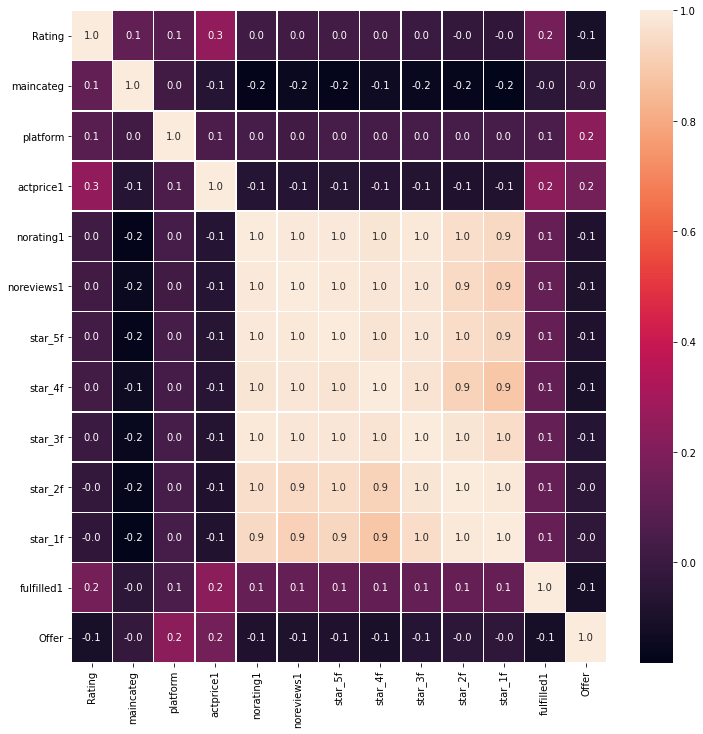

In [154]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [155]:
train.isnull().sum()

Rating          0
maincateg       0
platform        0
actprice1       0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
Offer           0
dtype: int64

In [156]:
sum(train.isna().sum(axis=1) > 0) # rows having any null value

783

In [157]:
train.shape

(15730, 13)

In [158]:
train=train.dropna(axis=0).reset_index(drop=True)
train.shape

(14947, 13)

In [159]:
train.columns

Index(['Rating', 'maincateg', 'platform', 'actprice1', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1', 'Offer'],
      dtype='object')

In [160]:
X = train.drop(['Offer','star_1f','fulfilled1'],axis=1)
y = train.Offer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [161]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [162]:
from sklearn import metrics

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [163]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_scaled,y_train)

pred = lin_reg.predict(X_test_scaled)

c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [164]:
test_pred = lin_reg.predict(X_test_scaled)

In [165]:
results_test = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362


In [1]:
model = Ridge()
model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)

NameError: name 'Ridge' is not defined

In [167]:
results_test_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363


In [168]:
model = Lasso()
model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)

In [169]:
results_test_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+05, tolerance: 4.998e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.227e+04, tolerance: 4.986e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number o

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694


In [170]:
model = ElasticNet()
model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)

In [171]:
results_test_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+06, tolerance: 4.998e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.283e+05, tolerance: 4.986e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number o

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874


In [172]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled, y_train)

test_pred = sgd_reg.predict(X_test_scaled)

In [173]:
results_test_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000


In [174]:
br_reg = BayesianRidge()
br_reg.fit(X_train_scaled, y_train)

test_pred = br_reg.predict(X_test_scaled)

In [175]:
results_test_2 = pd.DataFrame(data=[["Bayesian Ridge Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000


In [176]:
hr_reg = HuberRegressor()
hr_reg.fit(X_train_scaled, y_train)

test_pred = hr_reg.predict(X_test_scaled)

In [177]:
results_test_2 = pd.DataFrame(data=[["Huber Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000


In [178]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)

test_pred = dt_reg.predict(X_test_scaled)

In [179]:
results_test_2 = pd.DataFrame(data=[["Decision Tree Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000


In [180]:
rf_reg = RandomForestRegressor() # n_estimators=1000
rf_reg.fit(X_train_scaled, y_train)

test_pred = rf_reg.predict(X_test_scaled)

In [181]:
results_test_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000


In [182]:
svm_reg = SVR()
svm_reg.fit(X_train_scaled, y_train)

test_pred = svm_reg.predict(X_test_scaled)

In [183]:
results_test_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


In [184]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)

test_pred = gb_reg.predict(X_test_scaled)

In [185]:
results_test_2 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


In [186]:
hgb_reg = HistGradientBoostingRegressor()
hgb_reg.fit(X_train_scaled, y_train)

test_pred = hgb_reg.predict(X_test_scaled)

In [187]:
results_test_2 = pd.DataFrame(data=[["Histogram Gradient Boosting Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


In [188]:
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train_scaled, y_train)

test_pred = cat_reg.predict(X_test_scaled)

Learning rate set to 0.060704
0:	learn: 18.9570067	total: 5.25ms	remaining: 5.24s
1:	learn: 18.7194636	total: 10.1ms	remaining: 5.05s
2:	learn: 18.4991691	total: 15ms	remaining: 4.99s
3:	learn: 18.2950859	total: 19.8ms	remaining: 4.93s
4:	learn: 18.1120075	total: 24.6ms	remaining: 4.9s
5:	learn: 17.9465800	total: 29.6ms	remaining: 4.9s
6:	learn: 17.7911730	total: 34.6ms	remaining: 4.91s
7:	learn: 17.6498571	total: 39.6ms	remaining: 4.91s
8:	learn: 17.5202468	total: 44.7ms	remaining: 4.92s
9:	learn: 17.3880323	total: 49.7ms	remaining: 4.92s
10:	learn: 17.2778950	total: 54.2ms	remaining: 4.87s
11:	learn: 17.1806635	total: 58.9ms	remaining: 4.85s
12:	learn: 17.0902716	total: 64.2ms	remaining: 4.88s
13:	learn: 17.0050525	total: 75.2ms	remaining: 5.29s
14:	learn: 16.9254374	total: 80.2ms	remaining: 5.26s
15:	learn: 16.8509442	total: 85.1ms	remaining: 5.23s
16:	learn: 16.7918111	total: 93.4ms	remaining: 5.4s
17:	learn: 16.7299060	total: 98.1ms	remaining: 5.35s
18:	learn: 16.6744911	total: 10

In [189]:
results_test_2 = pd.DataFrame(data=[["CatBoost Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


In [190]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)

test_pred = xgb_reg.predict(X_test_scaled)

In [191]:
results_test_2 = pd.DataFrame(data=[["XGB Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


In [192]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train_scaled, y_train)

test_pred = lgbm_reg.predict(X_test_scaled)

In [193]:
results_test_2 = pd.DataFrame(data=[["LGBM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


In [194]:
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train_scaled, y_train)

test_pred = lgbm_reg.predict(X_test_scaled)

In [195]:
results_test_2 = pd.DataFrame(data=[["AdaBoost Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


In [196]:
kn_reg = KNeighborsRegressor()
kn_reg.fit(X_train_scaled, y_train)

test_pred = kn_reg.predict(X_test_scaled)

In [197]:
results_test_2 = pd.DataFrame(data=[["KNeighbor Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_test = results_test.append(results_test_2, ignore_index=True)
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,14.742088,330.099914,18.168652,0.117087,0.129362
1,Ridge Regression,14.716652,327.607482,18.099930,0.123753,0.129363
2,Lasso Regression,14.949984,337.466862,18.370271,0.097383,0.054694
3,Elastic Net Regression,14.721229,328.173279,18.115554,0.122240,0.056874
4,Stochastic Gradient Descent,14.717842,327.651820,18.101155,0.123635,0.000000
5,Bayesian Ridge Regressor,14.731510,328.830726,18.133690,0.120482,0.000000
6,Huber Regressor,14.473933,335.329704,18.312010,0.103099,0.000000
7,Decision Tree Regressor,6.903783,196.381641,14.013623,0.474741,0.000000
8,Random Forest Regressor,6.497950,108.448585,10.413865,0.709934,0.000000
9,SVM Regressor,13.339749,293.902936,17.143598,0.213902,0.000000


<AxesSubplot:>

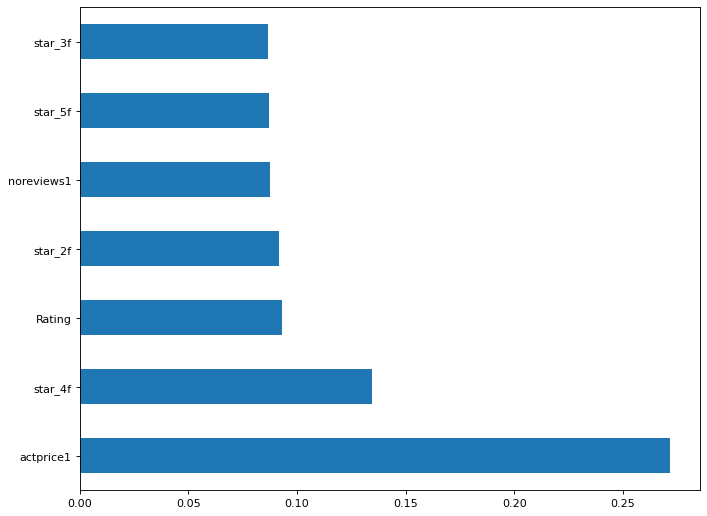

In [198]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf_reg.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

In [199]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [200]:
test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [201]:
le = LabelEncoder()
cols = ['maincateg', 'platform']
test[cols] = test[cols].apply(LabelEncoder().fit_transform)
test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,1,1,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,1,1,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [202]:
test.isna().sum()

id              0
title           0
Rating        203
maincateg       0
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [203]:
missing_columns = ["Rating", 'star_5f']

In [204]:
test=test.drop(['title','star_1f'],axis=1)

In [205]:
def random_imputation(test, feature):

    number_missing = test[feature].isnull().sum()
    observed_values = test.loc[test[feature].notnull(), feature]
    test.loc[test[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return test

In [206]:
for feature in missing_columns:
    test[feature + '_imp'] = test[feature]
    test = random_imputation(test, feature)

In [207]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = test[feature + "_imp"]
    parameters = list(set(test.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = RandomForestRegressor()
    model.fit(X = test[parameters], y = test[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[test[feature].isnull(), "Det" + feature] = model.predict(test[parameters])[test[feature].isnull()]

In [208]:
test=pd.concat([test, deter_data.reindex(test.index)], axis=1)
test.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,fulfilled1,Rating_imp,star_5f_imp,DetRating,Detstar_5f
0,2242,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,1,3.8,14238.0,3.8,14238.0
1,20532,3.9,1,1,499,3015,404,1458.0,657,397,182,1,3.9,1458.0,3.9,1458.0
2,10648,3.9,1,1,999,449,52,229.0,70,71,33,1,3.9,229.0,3.9,229.0
3,20677,3.9,0,1,2999,290,40,141.0,51,49,17,1,3.9,141.0,3.9,141.0
4,12593,3.9,0,1,999,2423,326,1265.0,414,293,143,0,3.9,1265.0,3.9,1265.0


In [209]:
X_train = train.drop(['Offer','star_1f'],axis=1)
Y_train = train["Offer"]
X_test  = test.drop(['id','Rating','star_5f','Rating_imp','star_5f_imp'],axis=1)

In [210]:
X_train.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,fulfilled1
0,3.9,1,1,999,38.0,7.0,17.0,9.0,6.0,3,0
1,3.8,0,1,1999,531.0,69.0,264.0,92.0,73.0,29,1
2,4.4,1,1,4999,17.0,4.0,11.0,3.0,2.0,1,1
3,4.2,0,1,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,1
4,3.9,0,1,2299,77.0,3.0,35.0,21.0,7.0,7,1


In [211]:
X_test.head()

,maincateg,platform,actprice1,norating1,noreviews1,star_4f,star_3f,star_2f,fulfilled1,DetRating,Detstar_5f
0,0,1,999,27928,3543,4295,3457,1962,1,3.8,14238.0
1,1,1,499,3015,404,657,397,182,1,3.9,1458.0
2,1,1,999,449,52,70,71,33,1,3.9,229.0
3,0,1,2999,290,40,51,49,17,1,3.9,141.0
4,0,1,999,2423,326,414,293,143,0,3.9,1265.0


In [212]:
X_test=X_test.rename(columns={"DetRating": "Rating",'Detstar_5f':'star_5f'})
X_test.head()

,maincateg,platform,actprice1,norating1,noreviews1,star_4f,star_3f,star_2f,fulfilled1,Rating,star_5f
0,0,1,999,27928,3543,4295,3457,1962,1,3.8,14238.0
1,1,1,499,3015,404,657,397,182,1,3.9,1458.0
2,1,1,999,449,52,70,71,33,1,3.9,229.0
3,0,1,2999,290,40,51,49,17,1,3.9,141.0
4,0,1,999,2423,326,414,293,143,0,3.9,1265.0


In [213]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

c:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [214]:
X_test.isna().sum()

maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_4f       0
star_3f       0
star_2f       0
fulfilled1    0
Rating        0
star_5f       0
dtype: int64

In [215]:
model = RandomForestRegressor().fit(X_train_scaled, Y_train)
Offer_pred = model.predict(X_test_scaled)
Offer_pred=pd.DataFrame(Offer_pred)
Offer_pred.head()

,0
0,50.933497
1,50.848950
2,31.944500
3,23.350200
4,49.682350


In [216]:
a=100-Offer_pred
a.head()

,0
0,49.066503
1,49.151050
2,68.055500
3,76.649800
4,50.317650


In [217]:
b=a*X_test['actprice1']/100
b.head()

,0,1,2,3,4,5,6,7,8,9,...,5234,5235,5236,5237,5238,5239,5240,5241,5242,5243
0,490.174368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,491.018989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,679.874445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,765.731502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,502.673323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
b.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5234, 5235, 5236, 5237, 5238, 5239, 5240, 5241, 5242, 5243],
           dtype='int64', length=5244)

In [219]:
c=pd.DataFrame(b[0])
c=c.round()
c.head()

,0
0,490.0
1,491.0
2,680.0
3,766.0
4,503.0


In [220]:
Submission=pd.concat([test, c.reindex(test.index)], axis=1)
Submission.head()
print(Submission.shape)

(5244, 17)


In [221]:
Submission.columns

Index([         'id',      'Rating',   'maincateg',    'platform',
         'actprice1',   'norating1',  'noreviews1',     'star_5f',
           'star_4f',     'star_3f',     'star_2f',  'fulfilled1',
        'Rating_imp', 'star_5f_imp',   'DetRating',  'Detstar_5f',
                   0],
      dtype='object')

In [222]:
Submission=Submission.drop(['Rating', 'maincateg', 'platform', 'actprice1',
       'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'fulfilled1',
       'Rating_imp', 'star_5f_imp',   'DetRating',  'Detstar_5f'],axis=1)

Submission.head()

,id,0
0,2242,490.0
1,20532,491.0
2,10648,680.0
3,20677,766.0
4,12593,503.0


In [223]:
Submission.columns

Index(['id', 0], dtype='object')

In [224]:
Submission=Submission.rename(columns={0: "price1"})
Submission.head()

,id,price1
0,2242,490.0
1,20532,491.0
2,10648,680.0
3,20677,766.0
4,12593,503.0


In [225]:
Submission.shape

(5244, 2)

In [226]:
res = pd.DataFrame(Submission) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["id",'price1']
res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.